**Classification of a simple dataset using Kmeans**

<u>Goal:</u>

The main goal is to learn how to use KNN with scikit-learn library"

<u>To do:</u>

Complete the source code whenever you find <font color='red'>#?</font>

This case study concerns simple employee data.

This data does not require preprocessing.

The goal is to :
- From a labeled population of employees, apply KNN to find the best classifier.
- Given a new employee, predict the label of the class to which he belongs.

**1. Create the dataset**

The dataset is a <font color='red'>data table</font> where :
- Rows are employees
- The columns are :
   - The columns that correpond to the numerical primitive caracteristics : 'age' and 'salary'
   - The target column is 'category'

In [1]:
# Import pandas module and give it pd as alias
#?

In [73]:
# The data of employees is :
# [[1200,25,'Junior'],
# [1300,27,'Junior'],
# [1100,27,'Junior'],
# [1500,21,'Junior'],
# [1400,30,'Junior'],
# [1000,28,'Junior'],
# [2500,49,'Senior'],
# [2400,47,'Senior'],
# [2600,45,'Senior'],
# [2900,39,'Senior'],
# [1900,45,'Senior'],
# [1950,41,'Senior']]

# Their respective names : ['Ahmed','Farah','Walid','Rahma','Salma','Sonia']

# Create a dataframe using pd.DataFrame() function
# You pass as arguments :
# - the list of lists of employees above
# - index : their names
# - columns : caracteristics labels and target : 
#                   ['Amina','Amine','Ahmed','Amjed','Arwa','Aymen',
#                    'Samir','Sawsen','Souad','Salma','Sonia','Siwar']

df_employees = pd.DataFrame(#?,
                            columns=#?,
                            index=#?)
df_employees

,salary,age,category
Amina,1200,25,Junior
Amine,1300,27,Junior
Ahmed,1100,27,Junior
Amjed,1500,21,Junior
Arwa,1400,30,Junior
Aymen,1000,28,Junior
Samir,2500,49,Senior
Sawsen,2400,47,Senior
Souad,2600,45,Senior
Salma,2900,39,Senior


**2. Split dataset**

The dataset is splitted twice :
- Split 1 : into input & output
- Split 2 : into train & test

**2.1. Split the dataset into input and output**

The dataset is splitted into :
- Observable/Mesurable primitive data that correpond to primitive informations about the employees
- Target/Class data that correpond to the target column

In [74]:
# Input data is sub-dataframe composed of all the rows and all the columns except the target column
X=df_employees.iloc[#?,#?]
# Input data is pandas Series composed of all the employees and only the target column
y=df_employees.iloc[#?,#?]

In [75]:
# Show X (input data)
X

,salary,age
Amina,1200,25
Amine,1300,27
Ahmed,1100,27
Amjed,1500,21
Arwa,1400,30
Aymen,1000,28
Samir,2500,49
Sawsen,2400,47
Souad,2600,45
Salma,2900,39


In [76]:
# Show y (output data)
y

Amina     Junior
Amine     Junior
Ahmed     Junior
Amjed     Junior
Arwa      Junior
Aymen     Junior
Samir     Senior
Sawsen    Senior
Souad     Senior
Salma     Senior
Sonia     Senior
Siwar     Senior
Name: category, dtype: object

**2.2. Split the dataset into train & test**

The input and output data are splitted into train and test sets :
- X_train & y_train : are the train dataset
- X_test & y_test : are the test dataset

To do it, we use the <font color='red'>train_test_split()</font> function

In [77]:
# Import train_test_split from sklearn.model_selection
from #? import #?

In [78]:
# Call train_test_split
# Pass arguments :
# - X : Observable/Mesurable/Input data
# - y : Target/Class/Output data
# - train_size : % of train data, in our case 0.7
# - stratify : an array of labels given to data 
#       + It ensures that the distribution of classes or categories 
#         in the original dataset is preserved in both the training and testing sets.
#       + It is important when dealing with imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(#? , #? , train_size=#?, stratify=y)

In [79]:
# Show y_train
y_train

Salma     Senior
Sonia     Senior
Aymen     Junior
Siwar     Senior
Sawsen    Senior
Amine     Junior
Amina     Junior
Ahmed     Junior
Name: category, dtype: object

In [80]:
# Show y_test
y_test

Arwa     Junior
Souad    Senior
Samir    Senior
Amjed    Junior
Name: category, dtype: object

**2. Learning process using KNN**

In scikit-learn ,<font color='red'>KNN</font> is implemented as <font color='red'>KNeighborsClassifier class</font> in <font color='red'>sklearn.neighbors</font> module.

KNN class has :
- a <font color='red'>constructor function</font> that allows to initialize hyperparameters
- a <font color='red'>fit()</font> function that allows to fit the model given the training data
- a <font color='red'>predict()</font> function that allows to predict the class label for a given new data

In [81]:
# Import KNN class from sklearn.neighbors module
from #? import #?

In [82]:
# Create a KNN instance denoted knn from KNeighborsClassifier class
# Initialize the hyperparameter :
# - n_neighbors : it represents the number of neighbors 
#   used to vote the class label in prediction process
#   In our case, its value is 3
knn = #?

In [83]:
# Call knn.fit() function
# Pass as arguments :
# - the train data X_train
# - the train class labels y_train 
knn.fit(#?, #?)

KNeighborsClassifier(n_neighbors=3)

In [84]:
# We can show the class labels detected by the classifier
knn.classes_

array(['Junior', 'Senior'], dtype=object)

**Evaluation**

In [85]:
# Predict class labels for test data
# Call predict predict() and
# Pass X_test as argument
y_test_pred= knn.predict(#?)
y_test_pred

array(['Junior', 'Senior', 'Senior', 'Junior'], dtype=object)

In [86]:
# Show matching between predicted class labels and true class labels
y_test_pred==y_test

Arwa     True
Souad    True
Samir    True
Amjed    True
Name: category, dtype: bool

In [87]:
# Import confusion matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [88]:
# compute confusion matrix
# Pass as arguments :
# - y_test (true class labels of test data)
# - y_test_pred (predicted class labels of test data)
confusion_matrix(#?, #?)

array([[2, 0],
       [0, 2]], dtype=int64)

In [89]:
# Import accuracy score function from sklearn.metrics
from sklearn.metrics import  accuracy_score

In [90]:
# compute accuracy score
# Pass as arguments :
# - y_test (true class labels of test data)
# - y_test_pred (predicted class labels of test data)
accuracy_score(#?, #?)

1.0

In [91]:
# Import classification report from sklearn.metrics
from sklearn.metrics import classification_report

In [92]:
# Show recall and precision by class
print(classification_report(#?, #?))

              precision    recall  f1-score   support

      Junior       1.00      1.00      1.00         2
      Senior       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



**3. Visualize the classes**

Once the learning process is completed, we can visualize the predicted classes

In [93]:
# Show the clusters of training dataset
class_junior = #?
class_senior = #?

In [94]:
# class 'Junior'
class_junior

,salary,age
Arwa,1400,30
Amjed,1500,21


In [95]:
# class 'Senior'
class_senior

,salary,age
Souad,2600,45
Samir,2500,49


**4. Prediction process**

Once the learning process is completed, we can predict the cluster label for a new employee

In [96]:
# Let emp_new be a new employee with name 'Ali' and age 24 and salary 500.67
# We create it as a Dataframe with values = [[500.67,24]]
# Keep the same column names
df_emp_new = pd.DataFrame(#?, 
                        columns=#?,
                        index=#?)
df_emp_new

,salary,age
Ali,500.67,24


In [97]:
# Predict the class label of emp_new
y_new_emp=knn.predict(#?)
y_new_emp

array(['Junior'], dtype=object)

**5. Visualization of clusters**

We can visualize the population and the predicted classes.

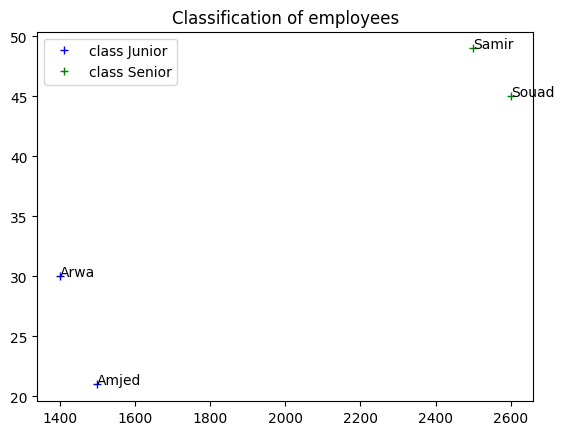

In [98]:
# import required library
import matplotlib.pyplot as plt

# Show the test employees with their predicted classes 
# # with differents colors (based on class) and + symbol 
plt.plot(#? , #? ,  #? , label=#?)
plt.plot(#? ,  #? ,  #? , label=#?)

# When visualizing the dataset and its clusters, use the following code 
# to annotate the figure points of employees with their names :
for nom, x, y in zip(#?):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.legend()
plt.title('Classification of employees')
plt.show()